# wavdetect


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 2254
download_chandra_obsid 2254 --exclude vvref,osol,eph1,evt2
chandra_repro 2254 out=`pwd` clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      229 Mb  ####################            2 s  94152.5 kb/s
  asol     fits       20 Mb  ####################          < 1 s  47986.4 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  43552.6 kb/s
  stat     fits        3 Mb  ####################          < 1 s  46832.9 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  37342.9 kb/s
  bias     fits      494 Kb  ####################          < 1 s  22607.0 kb/s
  bias     fits      433 Kb  ####################          < 1 s  16859.1 kb/s
  bias     fits      431 Kb  ####################          < 1 s  12967.0 kb/s
  bias     fits      430 Kb  ####################          < 1 s  12724.1 kb/s
  bias     fits      429 Kb  ####################          < 1 s  21861.6 kb/s
  bias     fits      427 Kb  ####################    

In [3]:
dmcopy "acisf02254_repro_fov1.fits[ccd_id=0:3]" s3.fov clob+
dmcopy "acisf02254_repro_evt2.fits[ccd_id=0:3,sky=region(s3.fov)]" 2254_evt2_filtered.fits clob+

In [4]:
fluximage 2254_evt2_filtered.fits binsize=1 bands=broad outroot=s3 clob+ psfecf=0.393

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf02254_000N001_asol1.fits found.
Bad-pixel file acisf02254_repro_bpix1.fits found.
Mask file acisf02254_000N004_msk1.fits found.

The output images will have 2733 by 2735 pixels, pixel size of 0.492 arcsec,
    and cover x=2787.5:5520.5:1,y=2761.5:5496.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 2254
Creating 4 instrument maps for obsid 2254
Creating 4 exposure maps for obsid 2254
Combining 4 exposure maps for obsid 2254
Thresholding data for obsid 2254
Exposure-correcting image for obsid 2254
Creating PSF map for obsid 2254

The following files were created:

 The clipped counts image is:
     s3_broad_thresh.img

 The clipped exposure map is:
     s3_broad_thresh.expmap

 The PSF map is:
     s3_broad_thresh.psfmap

 The exposure-corrected image is:
     s3_broad_flux.img



In [5]:
dmlist s3_broad_thresh.img blocks

 
--------------------------------------------------------------------------------
Dataset: s3_broad_thresh.img
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: EVENTS_IMAGE                   Image      Int4(2733x2735)


In [6]:
ds9 s3_broad_thresh.img \
  -block 3 \
  -scale log \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

[1] 6158
[1]+  Done                    ds9 s3_broad_thresh.img -block 3 -scale log -saveimage png ds9_01.png


## psfmap

In [7]:
mkpsfmap s3_broad_thresh.img outfile=step_by_step_s3_psfmap.fits energy=1.4967 ecf=0.393 clob+

## A. Simple Example

In [8]:
punlearn wavdetect
pset wavdetect infile=s3_broad_thresh.img
pset wavdetect psffile=s3_broad_thresh.psfmap

pset wavdetect outfile=s3_src.fits
pset wavdetect scellfile=s3_scell.fits
pset wavdetect imagefile=s3_imgfile.fits
pset wavdetect defnbkgfile=s3_nbgd.fits
pset wavdetect regfile=s3_src.reg
wavdetect mode=h clobber=yes


[1] 6606
[1]+  Done                    ds9 s3_broad_thresh.img -block 3 -scale log -region s3_src.fits -saveimage png ds9_02.png


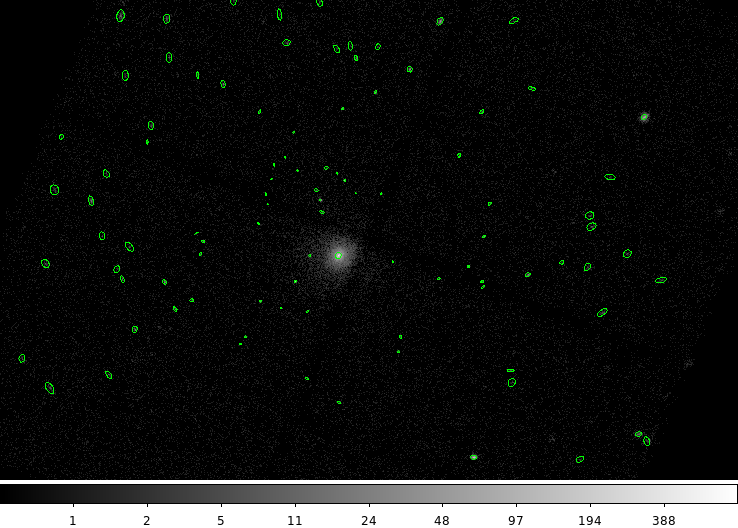

In [9]:
ds9 s3_broad_thresh.img \
  -block 3 \
  -scale log \
  -region s3_src.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [10]:
punlearn wavdetect
pset wavdetect infile=s3_broad_thresh.img
pset wavdetect psffile=s3_broad_thresh.psfmap

pset wavdetect outfile=as3_src.fits
pset wavdetect scellfile=as3_scell.fits
pset wavdetect imagefile=as3_imgfile.fits
pset wavdetect defnbkgfile=as3_nbgd.fits
pset wavdetect regfile=as3_src.reg

pset wavdetect scales="1.0 2.0 4.0 8.0 16.0"
pset wavdetect sigthresh=4e-06
wavdetect mode=h clobber=yes



In [18]:
ds9 s3_broad_thresh.img \
  -pan to 4060 4080 physical \
  -zoom 8 \
  -scale log \
  -region width 3 \
  -region s3_src.fits \
  -region select all \
  -region color red \
  -region background \
  -region select none \
  -region color green \
  -region source \
  -region as3_src.fits \
  -region select all -region copy -region select none\
  s3_broad_thresh.img \
  -region paste wcs \
  -zoom 0.25 \
  -pan to 4010 4320 \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

XPA$ERROR no 'xpaset' access points match template: ds9


## With expmap

In [12]:
punlearn wavdetect
pset wavdetect infile=s3_broad_thresh.img
pset wavdetect psffile=s3_broad_thresh.psfmap
pset wavdetect expfile=s3_broad_thresh.expmap

pset wavdetect outfile=s3_expmap_src.fits
pset wavdetect scellfile=s3_expmap_scell.fits
pset wavdetect imagefile=s3_expmap_imgfile.fits
pset wavdetect defnbkgfile=s3_expmap_nbgd.fits
pset wavdetect regfile=s3_expmap_src.reg
wavdetect mode=h clobber=yes

In [13]:
ds9 s3_broad_thresh.img \
  -block 3 \
  -scale log \
  -region s3_expmap_src.fits \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png

[1] 7722
[1]+  Done                    ds9 s3_broad_thresh.img -block 3 -scale log -region s3_expmap_src.fits -saveimage png ds9_04.png


In [14]:
dmlist "s3_expmap_src.fits[cols RA,DEC,PSF_SIZE]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    RA                   DEC                  PSF_SIZE
 
     1       212.7564572165        52.0672758583         8.5082626343
     2       212.9904537636        52.1067162749         8.0642518997
     3       212.8099536903        52.1081606779         4.2496347427
     4       212.7450178603        52.1200116958         4.3459811211
     5       212.6347701839        52.1293555975         8.0236558914
     6       212.8562454429        52.1523497928         1.6900422573
     7       212.9888631721        52.1537083760         5.3986010551
     8       212.7953056866        52.1632417214         1.2381882668
     9       212.9007241916        52.1664415390         1.8939571381
    10       212.8973928110        52.1693932690         1.7141796350
    11       212.7938766628        52.1693774

   115       212.8413555796        52.3551510891         9.1865854263
   116       212.8506424920        52.3560750915         9.3323507309
   117       212.9284467442        52.3817914743        13.7309980392


```bash
prism s3_expmap_src.fits &
sleep 3
import -window prism prism.png
xpaset -p prism quit
display < prism.png
```


# Cleanup


In [16]:
/bin/rm -rf 2254 
/bin/rm -f acisf* pcadf*
 